In [1]:
import pandas as pd
df = pd.read_csv("heart.csv")
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


(   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
 0   52    1   0       125   212    0        1      168      0      1.0      2   
 1   53    1   0       140   203    1        0      155      1      3.1      0   
 2   70    1   0       145   174    0        1      125      1      2.6      0   
 3   61    1   0       148   203    0        1      161      0      0.0      2   
 4   62    0   0       138   294    1        1      106      0      1.9      1   
 
    ca  thal  target  
 0   2     3       0  
 1   0     3       0  
 2   0     3       0  
 3   1     3       0  
 4   3     2       0  ,
 None)

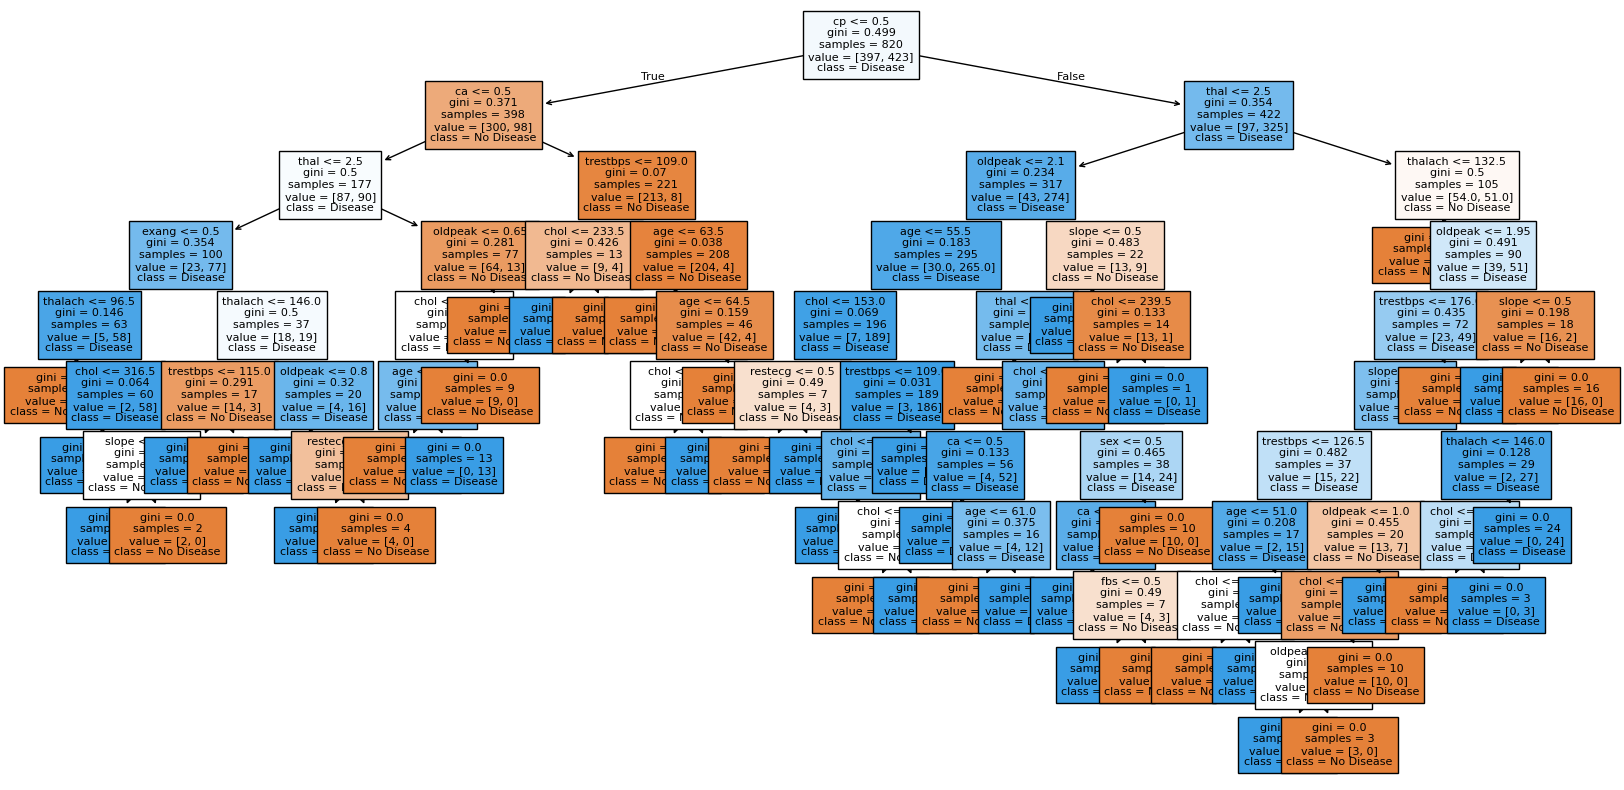

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True, fontsize=8)
plt.show()


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Accuracy calculation
rf_train_acc = accuracy_score(y_train, rf.predict(X_train))
rf_test_acc = accuracy_score(y_test, rf.predict(X_test))

# Display results
print("Training Accuracy:", rf_train_acc)
print("Testing Accuracy:", rf_test_acc)


Training Accuracy: 1.0
Testing Accuracy: 0.9853658536585366


In [6]:

# Feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Cross-validation to evaluate model
cv_scores = cross_val_score(rf, X, y, cv=5)  # 5-fold cross-validation

(feature_importances, cv_scores.mean(), cv_scores.std())

(cp          0.135072
 ca          0.127327
 thalach     0.122169
 oldpeak     0.121905
 thal        0.110518
 age         0.077908
 chol        0.074822
 trestbps    0.071171
 exang       0.057594
 slope       0.045782
 sex         0.028731
 restecg     0.018557
 fbs         0.008444
 dtype: float64,
 np.float64(0.9970731707317073),
 np.float64(0.005853658536585371))